# **k-nearest neighbor algorithm using Sklearn - Python**

- K-Nearest Neighbors (KNN) works by identifying the 'k' nearest data points called as neighbors to a given input and predicting its class or value based on the majority class or the average of its neighbors. In this article we will implement it using Python's Scikit-Learn library.

In [ ]:
import pandas as pd

## Load iris dataset and explore the feature variables and Target variables

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.shape

(150, 4)

In [ ]:
df['target']= iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.loc[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df.loc[df['target']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


# Generating and Visualizing the 2D Data (taking "Sepal Width" and "Sepal Length")

- We will import libraries like [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/), and [scikit-learn](https://scikit-learn.org/).


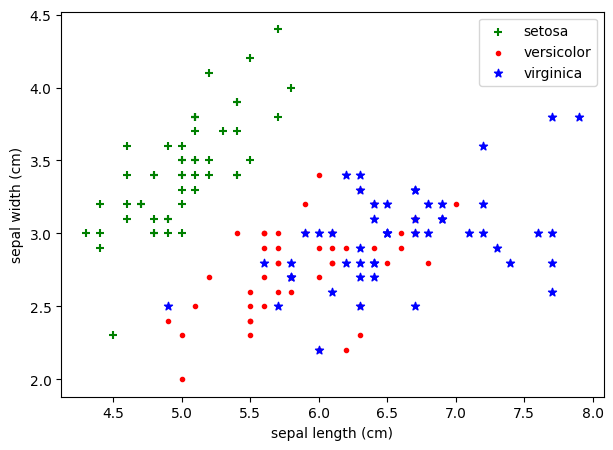

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,5))  # new, clean figure
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df.iloc[:50,0], df.iloc[:50,1], color='green', marker='+', label='setosa')
plt.scatter(df.iloc[50:100,0], df.iloc[50:100,1], color='red', marker='.', label='versicolor')
plt.scatter(df.iloc[100:150,0], df.iloc[100:150,1], color='blue', marker='*', label='virginica')

plt.legend()
plt.show()

- Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('target', axis=1)
y=df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)


In [ ]:
X_train.shape

(120, 4)

In [ ]:
y_train.shape

(120,)

## Fit the k-NN Model and Evaluate with different values of K
[KNN API Refrerence](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - This creates a k-Nearest Neighbors (k-NN) classifier with k = 5 meaning it considers the 5 nearest neighbors for making predictions.
 - fit(X_train, y_train) trains the model on the training data.
 - predict(X_test) generates predictions for the test data.
 - accuracy_score() compares the predicted labels (y_pred) with the true labels (y_test) and calculates the accuracy i.e the proportion of correct predictions.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
pip install mlxtend

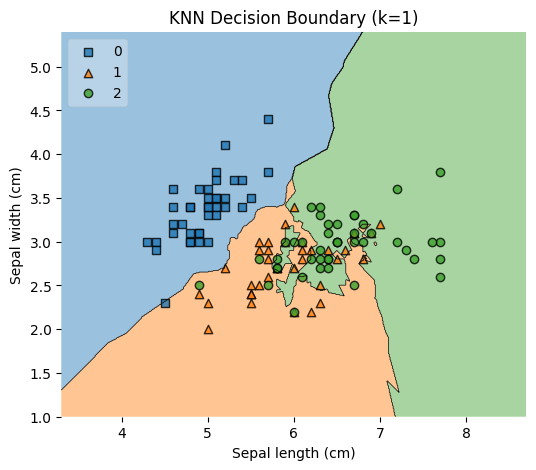

In [ ]:

# --- Plot decision regions with mlxtend ---

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

# Convert to NumPy arrays (and select only 2 features for plotting)
X_train_np = X_train.iloc[:, :2].to_numpy()   # first 2 features
y_train_np = y_train.to_numpy()

# retrain KNN on these 2 features
knn.fit(X_train_np, y_train_np)

# plot decision boundary
plt.figure(figsize=(6,5))
plot_decision_regions(X=X_train_np, y=y_train_np, clf=knn, legend=2)
plt.title("KNN Decision Boundary (k=1)")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()

### Check the model's performance with different values of k

In [ ]:
from sklearn.metrics import accuracy_score
scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))


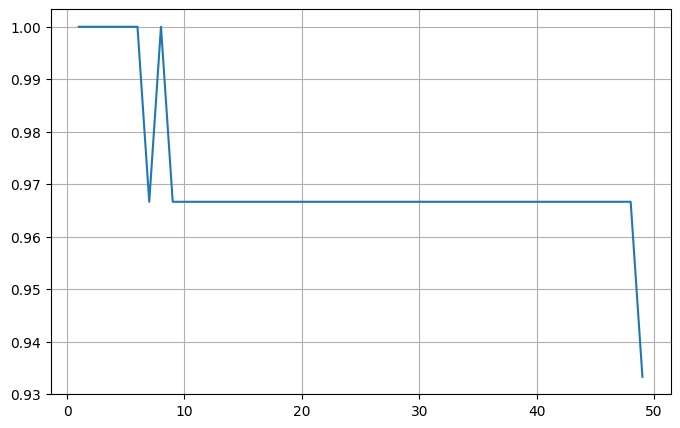

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1,50),scores)
plt.grid(True)
plt.show()

## Question: Why with Small **"K"** value gives higher acuuracy score ?

In [ ]:
import numpy as np
p1 = np.array([20, 10000])
p2 = np.array([23, 15000])
p3 = np.array([30, 12000])

In [ ]:
def euclidean_disatnce(object1, object2):
  return np.sqrt(np.sum((object1-object2)**2))

In [ ]:
distance_p1_p2 = euclidean_disatnce(p1, p2)
distance_p1_p3 = euclidean_disatnce(p1, p3)
print(distance_p1_p2, distance_p1_p3)

5000.000899999919 2000.0249998437519


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
points = np.array([p1, p2, p3])
scaler = StandardScaler()
points_scaled = scaler.fit_transform(points)
print(points_scaled)

[[-1.03422447 -1.13554995]
 [-0.31822291  1.29777137]
 [ 1.35244738 -0.16222142]]


In [ ]:
distance_p1_p2 = euclidean_disatnce(p1, p2)
distance_p1_p3 = euclidean_disatnce(p1, p3)
print(distance_p1_p2, distance_p1_p3)

5000.000899999919 2000.0249998437519
